## Student Perception Analysis using Multiple Linear Regression to predict marks

### Importing libaries and understanding the data and its attributes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('StudentData.csv')
data.describe()

,Age,self study,Online class duration,expected online class duration,Total data usage,Data Online class,Marks
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,21.180328,3.860656,4.729508,4.049180,2.070492,1.186885,84.306557
std,1.839458,2.604693,1.374087,1.321946,1.712634,0.598255,8.104893
min,18.000000,1.000000,1.000000,1.000000,0.500000,0.100000,65.000000
25%,20.000000,2.000000,4.000000,3.000000,1.500000,1.000000,80.000000
50%,21.000000,3.000000,5.000000,4.000000,1.500000,1.000000,85.000000
75%,22.000000,6.000000,5.000000,5.000000,2.000000,1.500000,90.000000
max,26.000000,12.000000,8.000000,8.000000,10.000000,3.000000,96.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 17 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Gender                                                                                             61 non-null     object 
 1   Age                                                                                                61 non-null     int64  
 2   Education                                                                                          61 non-null     object 
 3   self study                                                                                         61 non-null     float64
 4   Online class duration                                                                              61 non-null     float64
 

In [4]:
data.Gender.value_counts()

Male      43
Female    18
Name: Gender, dtype: int64

In [5]:
data.Education.value_counts()

Undergraduate (or diploma)    36
Post-graduation               24
Ph D                           1
Name: Education, dtype: int64

<AxesSubplot:xlabel='expected online class duration', ylabel='Count'>

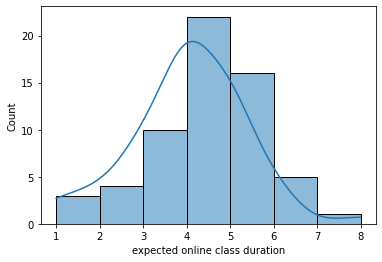

In [6]:
# data['expected online class duration'].plot(kind='hist');
sns.histplot(data['expected online class duration'], kde=True)

In [7]:
# data2 = pd.get_dummies(data['Education'], drop_first=True)
# data = pd.concat((data, data2), axis=1)

In [8]:
data.head()

,Gender,Age,Education,self study,Online class duration,expected online class duration,Total data usage,Data Online class,Internet speed,Academic Outcome,Marks,Perception on Online Classes [Better in understanding the concept .],Interest of participation in Online Classes [How actively do you participate in Online classes.],Interest of participation in Online Classes [How often you get your teachers assistance.],Interest of participation in Online Classes [How much do you use social media(including YouTube)],Interest of participation in Online Classes [Get bored in class.],Interest of participation in Online Classes [Cheat in exams]
0,Male,20,Undergraduate (or diploma),1.0,2.0,1,0.5,0.1,The worst(cannot even join the calsses),No,65.0,2 Disagree,Never,Often,Always,Always,Always
1,Male,21,Undergraduate (or diploma),2.0,4.5,4,1.0,0.8,Good(voice breaks and video stops very rarely),No,68.0,2 Disagree,Always,Often,Sometimes,Often,Often
2,Female,19,Undergraduate (or diploma),1.0,3.0,3,1.5,0.7,Good(voice breaks and video stops very rarely),No,68.0,2 Disagree,Seldom,Seldom,Sometimes,Seldom,Seldom
3,Male,19,Undergraduate (or diploma),4.0,5.0,2,1.0,1.0,The worst(cannot even join the calsses),No,70.0,3 Neutral,Seldom,Seldom,Sometimes,Sometimes,Seldom
4,Male,22,Undergraduate (or diploma),3.0,6.0,4,2.0,1.5,Have no opinion,Yes,70.0,2 Disagree,Seldom,Sometimes,Sometimes,Sometimes,Sometimes


<AxesSubplot:>

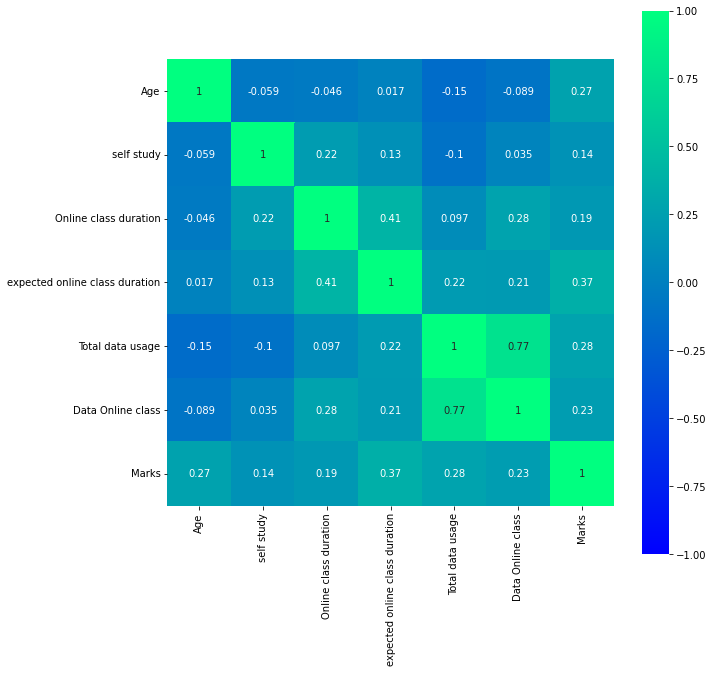

In [9]:
plt.figure(figsize=(10,10))
mask1 = np.zeros_like(data.corr())
sns.heatmap(data.corr(), annot=True, cmap='winter', mask=mask1, vmin=-1, square=True)

<AxesSubplot:xlabel='Marks', ylabel='Count'>

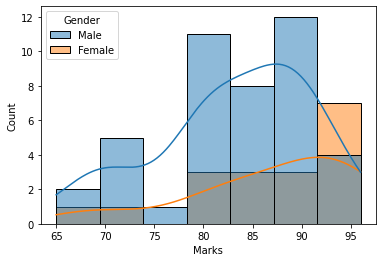

In [10]:
sns.histplot(data=data, x='Marks', kde=True, hue='Gender')

<AxesSubplot:xlabel='Marks', ylabel='Count'>

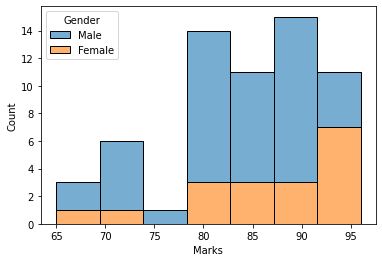

In [11]:
sns.histplot(data=data, x='Marks', hue='Gender', alpha=.6, kde=False, multiple='stack')